In [1]:
import numpy as np
import scipy as sp
from matplotlib.pyplot import cm
# my libraries import 
import preprocessing as prep
import plot as plt
import mvg
import utility as util
import logistic_regression as lr
import dcf 
import gmm 
import svm

In [2]:
N_FEATURES = 12
# preprocessing 
LDA = False
PCA = False
# enable models 
DATA_VISUALIZATION = False
MVG = True
LOGISTIC_REGRESSION = False
SVM = False
GMM = False
DIM_REDUCTION = False
FUSION = False

# dataset path
fileTR = './data/Train.txt'
fileTE = './data/Train.txt'

# named features 
features = ["Feature(" + str(x) + ")" for x in range(N_FEATURES)]

# load dataset
DTR, LTR = prep.load_dataset(fileTR)
DTE, LTE = prep.load_dataset(fileTE)

### Dimensionality Reduction    

In [3]:
# PCA parameter
m = 9 

if DIM_REDUCTION: 
    if LDA:
        print("---- LDA ----")
        DTR_lda = prep.LDA(DTR, LTR, [0,1])
        print("space reducted to:", DTR_lda.shape)
    if PCA:
        PCA_enabled = True
        print("---- PCA with m=", m," -----")

### Data Visualization  

In [4]:
if DATA_VISUALIZATION:
    maleDTR = DTR[:, LTR == 0]
    femaleDTR = DTR[:, LTR == 1]
    plt.plot_features_distr(DTR, LTR, features)
    plt.plot_relation_beetween_feautures(DTR, LTR, features)
    plt.plot_heatmap(DTR, features, cm.Greys)
    plt.plot_heatmap(maleDTR, features, cm.Blues)
    plt.plot_heatmap(femaleDTR, features, cm.Reds)

In [5]:
# folds preparation
applications = [(0.5, 1, 1), (0.1, 1, 1), (0.9, 1, 1)]
# n - folds
k = 4
# split z-norm DTR and DTR 
foldsZ, folds_labels = prep.make_folds(DTR, LTR, k)
folds, folds_labels = prep.make_folds(DTR, LTR, k)

fold: 0  -  (12, 1500)
fold: 1  -  (12, 1500)
fold: 2  -  (12, 1500)
fold: 3  -  (12, 1500)
fold: 0  -  (12, 1500)
fold: 1  -  (12, 1500)
fold: 2  -  (12, 1500)
fold: 3  -  (12, 1500)


### MVG

In [6]:
if MVG:
    print("----- MVG full covariance -----")
    full_minDCFs = []
    for application in applications:
        pi, Cfn, Cfp = application
        print("Application with (pi:", pi,", Cfn",Cfn,", Cfp",Cfp,")")
        classPriors = [pi, 1-pi]
        llrs = util.k_folds(folds, folds_labels, k, mvg.MVG, PCA_enabled=PCA, m=m, classPriors=classPriors)
        scores = np.hstack(llrs)
        minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)
        full_minDCFs.append(minDCF)
        #print("minDCF:", minDCF)
    print("----- MVG diagonal covariance -----")
    diag_minDCFs = []
    for application in applications:
        pi, Cfn, Cfp = application
        print("Application with (pi:", pi,", Cfn",Cfn,", Cfp",Cfp,")")
        classPriors = [pi, 1-pi]
        llrs = util.k_folds(folds, folds_labels, k, mvg.MVG, PCA_enabled=PCA, m=m, classPriors=classPriors, diag=True)
        scores = np.hstack(llrs)
        minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)
        diag_minDCFs.append(minDCF)
    
    print("----- MVG tied full covariance -----")
    tied_minDCFs = []
    for application in applications:
        pi, Cfn, Cfp = application
        print("Application with (pi:", pi,", Cfn",Cfn,", Cfp",Cfp,")")
        classPriors = [pi, 1-pi]
        llrs = util.k_folds(folds, folds_labels, k, mvg.MVG, PCA_enabled=PCA, m=m, classPriors=classPriors, tied=True)
        scores = np.hstack(llrs)
        minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)
        tied_minDCFs.append(minDCF)
    
    print("----- MVG tied digonal covariance -----")
    tied_diag_minDCFs = []
    for application in applications:
        pi, Cfn, Cfp = application
        print("Application with (pi:", pi,", Cfn",Cfn,", Cfp",Cfp,")")
        classPriors = [pi, 1-pi]
        llrs = util.k_folds(folds, folds_labels, k, mvg.MVG, PCA_enabled=PCA, m=m, classPriors=classPriors, diag=True, tied=True)
        scores = np.hstack(llrs)
        minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)
        tied_diag_minDCFs.append(minDCF)    

----- MVG full covariance -----
Application with (pi: 0.5 , Cfn 1 , Cfp 1 )
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 0 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 1 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 2 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 3 ]
		minDCF: 0.04766666666666666
Application with (pi: 0.1 , Cfn 1 , Cfp 1 )
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 0 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 1 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 2 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 3 ]
		minDCF: 0.12466666666666668
Application with (pi: 0.9 , Cfn 1 , Cfp 1 )
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 0 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 1 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 2 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 3 ]
		minDCF: 0.12733333333333335
----- MVG diagonal covariance -----
Application with (pi: 0.5 , Cfn 1 , Cf

### Balanced Logistic Regression

In [7]:

lambda_ = 10**-6
if LOGISTIC_REGRESSION:
    print("\n\n----- Linear logistic regression -----")
    classPriors = [0.5, 0.5]
    STE = util.k_folds(folds, folds_labels, k, lr.logreg, priors=classPriors, lambda_ = lambda_)
    scoresLR = np.hstack(STE)
    plt.plot_min_DCF_logreg(folds, folds_labels, k, applications, quadratic=False)
    for application in applications:
        pi, Cfn, Cfp = application
        l = 10e-6
        print("Application with ( pi:", pi,", Cfn:",Cfn,", Cfp:",Cfp,")")
        for pi_T in [0.5, 0.1, 0.9]:
            print("\tevaluating with pi_T:", pi_T)
            classPriors = [pi_T, 1-pi_T]
            STE = util.k_folds(folds, folds_labels, k, lr.logreg, priors=classPriors, lambda_ = lambda_)
            scores = np.hstack(STE)
            minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)
            #print("minDCF:", minDCF)
    print("------ Quadratic Logistic Regression ------")
    plt.plot_min_DCF_logreg(folds, folds_labels, k, applications, quadratic=True)
    for application in [applications[2]]:
        pi = application[0]
        Cfn = application[1]
        Cfp = application[2]
        
        print("Application with ( pi:", pi,", Cfn:",Cfn,", Cfp:",Cfp,")")
        for pi_T in [0.5, 0.1, 0.9]:
            print("\tevaluating with pi_T:", pi_T)
            classPriors = [pi_T, 1-pi_T]
            STE = util.k_folds(folds, folds_labels, k, lr.quadratic_logreg, priors=classPriors, lambda_ = lambda_)
            scores = np.hstack(STE)
            minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)

### SVM

In [8]:
if SVM: 
    print("\n\n----- linear SVM -----")
    plt.plot_min_DCF_svm(folds, folds_labels, k, applications, balanced=True)

    for application in applications:
        pi, Cfn, Cfp = application
        print("application:", application)
        for pi_T in [0.5, 0.1, 0.9]:
            print("\tevaluating with pi_T:", pi_T)
            classPriors = [pi_T, 1-pi_T]
            scores = util.k_folds(folds, folds_labels, k, svm.train_SVM_linear, C = 1)
            scores = np.hstack(scores)
            minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)

    print("----- Exponential SVM ----")
    gammas = [0.1, 0.01, 0.001]
    plt.plot_min_DCF_RBFsvm(folds, folds_labels, k, gammas)

    for application in applications:
        pi, Cfn, Cfp = application
        print("application:", application)
        for pi_T in [0.5, 0.1, 0.9]:
            print("\tevaluating with pi_T:", pi_T)
            classPriors = [pi_T, 1-pi_T]
            scores = util.k_folds(folds, folds_labels, k, svm.train_non_linear_SVM, kernel='rbf', C=0.10, gamma=0.01, balanced=True, priors=classPriors)
            scores = np.hstack(scores)
            
            minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)

    print("----- Quadratic SVM ----")
    plt.plot_min_DCF_poly_svm(folds, folds_labels, k, applications)
    scores = util.k_folds(folds, folds_labels, k, svm.train_non_linear_SVM, kernel='poly', C=0.1, d=2.0, c=1)
    scores = np.hstack(scores)
    for application in applications:
        pi, Cfn, Cfp = application
        print("application:", application)
        minDCF = dcf.compute_min_DCF(scores, np.hstack(folds_labels), pi, Cfn, Cfp)

### GMM (Gaussian Multivariate Model)

In [9]:
alpha = 0.1 
stopping_criterion = 1e-6
# number of components (2^G - 1)
G = 4
psi = 0.01 
if GMM:
    print("\n\n----- GMM Classifier -----")
    print("\tFull Covariance - Non Tied Cvoariances")
    

    plot_name = f"gmm-{2**(G-1)}-full-nonTied"
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=False,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=True, tied=False )
    minDCFsRaw = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=True,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=True, tied=False )
    minDCFsZ = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    
    
    plt.plot_minDCF_GMM_hist(minDCFsRaw, minDCFsZ, G, plot_name)
    
    # Full covariance --- tied model
    plot_name = f"gmm-{2**(G-1)}-full-tied"
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=False,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=True, tied=True )
    minDCFsRaw = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=True,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=True, tied=True )
    minDCFsZ = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    plt.plot_minDCF_GMM_hist(minDCFsRaw, minDCFsZ, G, plot_name)
    
    # Diag Covariance - Non Tied
    plot_name = f"gmm-{2**(G-1)}-diag-nonTied"
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=False,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=False, tied=False )
    minDCFsRaw = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=True,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=False, tied=False )
    minDCFsZ = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    plt.plot_minDCF_GMM_hist(minDCFsRaw, minDCFsZ, G, plot_name)
    
    # Diag Covariance - Tied
    plot_name = f"gmm-{2**(G-1)}-diag-tied"
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=False,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=False, tied=True )
    minDCFsRaw = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    folds_component_llrs = util.k_folds(folds, folds_labels, k, gmm.GMM, PCA_enabled, None, preprocessing=True,
                        alpha=alpha, stopping_criterion=stopping_criterion, G=G, psi=psi, full_cov=False, tied=True )
    minDCFsZ = dcf.GMM_minDCF(folds_component_llrs, folds_labels, G, k, applications[0])
    plt.plot_minDCF_GMM_hist(minDCFsRaw, minDCFsZ, G, plot_name)


### DET Plot and ROC curves

Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 0 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 1 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 2 ]
Z-Normalization ----- enabled
Z-Scoring...
		[ Fold 3 ]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


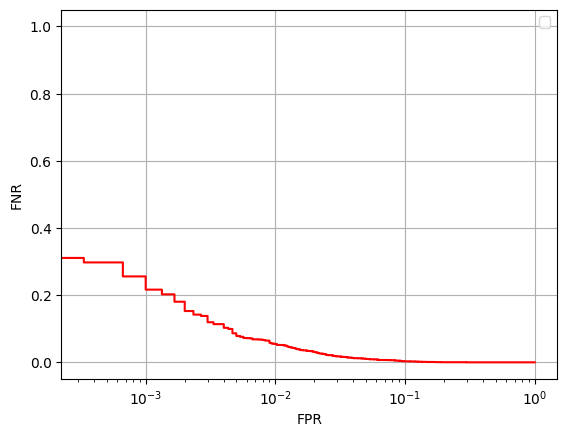

(6000,) (6000,)


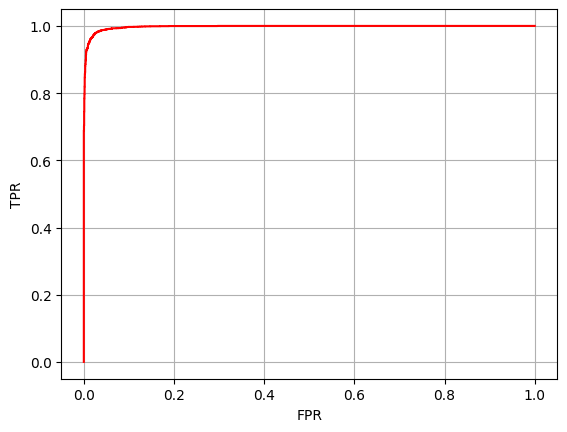

[False  True  True ...  True  True  True]
0.9756666666666667


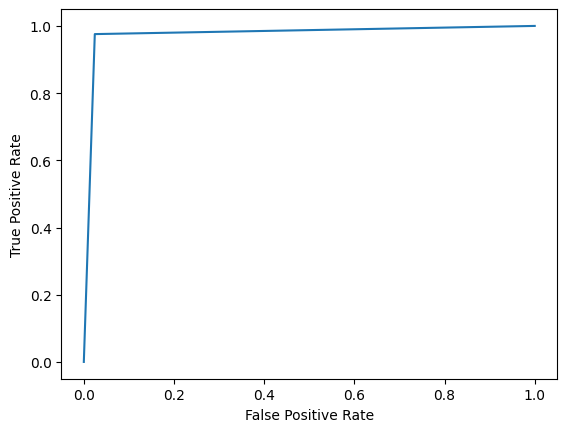

In [10]:
from matplotlib import pyplot as p
fps = [0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.6, 0.61, 0.67]
fns = [0.9, 0.8, 0.7, 0.65, 0.6, 0.5, 0.4, 0.49, 0.43]

llrs = util.k_folds(folds, folds_labels, k, mvg.MVG, PCA_enabled=PCA, m=m, classPriors=classPriors, diag=False, tied=True)
scores = np.hstack(llrs)
labels = np.hstack(folds_labels)
plt.plot_DET3(scores, labels)


print(LTR.shape, scores.shape)
plt.plot_ROC(scores, labels )



### Fusion

In [11]:
if FUSION:
    scores, labels = lr.score_fusion(scoresLR, scoresMVG,  np.hstack(folds_labels), [0.5, 0.5])
    print(scores.shape)
    minDCF = dcf.compute_min_DCF(scores.ravel(), labels, 0.5, 1, 1)